In [1]:
import os
os.chdir("/y/home/zyw/tmp/DeepPurpose/")

In [2]:
from scripts import utils,dataset,DTI

In [3]:
X_drug, X_target, y = dataset.load_process_DAVIS('./data/', binary=False)

Beginning Processing...
Default set to logspace (nM -> p) for easier regression
Done!


In [4]:
drug_encoding = 'CNN'
target_encoding = 'CNN'

In [5]:
train, val, test = utils.data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method = 'random', frac = [0.8,0.1,0.1])

Drug Target Interaction Prediction Mode...
in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
encoding protein...
unique target sequence: 379
splitting dataset...
Done.


In [6]:
config = utils.generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.0008, 
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12])

In [7]:
model = DTI.model_initialize(**config)

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 29.4895. Total time 0.00027 hours
Validation at Epoch 1 with loss:0.54298, MSE: 0.70455 , Pearson Correlation: 0.39057 with p-value: 3.99041 , Concordance Index: 0.74611
Training at Epoch 2 iteration 0 with loss 0.71309. Total time 0.02722 hours
Validation at Epoch 2 with loss:0.63505, MSE: 0.58605 , Pearson Correlation: 0.52018 with p-value: 4.26899 , Concordance Index: 0.77921
Training at Epoch 3 iteration 0 with loss 0.68010. Total time 0.06027 hours
Validation at Epoch 3 with loss:0.58635, MSE: 0.53032 , Pearson Correlation: 0.56732 with p-value: 1.13107 , Concordance Index: 0.79436
Training at Epoch 4 iteration 0 with loss 0.97754. Total time 0.09416 hours
Validation at Epoch 4 with loss:0.58243, MSE: 0.51124 , Pearson Correlation: 0.58746 with p-value: 1.86706 , Concordance Index: 0.80135
Training at Epoch 5 iteration 0 with loss 0.57485. Total time 0.13222 hours
Validation

Training at Epoch 40 iteration 0 with loss 0.33067. Total time 1.38 hours
Validation at Epoch 40 with loss:0.40944, MSE: 0.37369 , Pearson Correlation: 0.77498 with p-value: 0.0 , Concordance Index: 0.86697
Training at Epoch 41 iteration 0 with loss 0.37541. Total time 1.415 hours
Validation at Epoch 41 with loss:0.22660, MSE: 0.32178 , Pearson Correlation: 0.78009 with p-value: 0.0 , Concordance Index: 0.87115
Training at Epoch 42 iteration 0 with loss 0.34705. Total time 1.45055 hours
Validation at Epoch 42 with loss:0.28834, MSE: 0.31889 , Pearson Correlation: 0.77934 with p-value: 0.0 , Concordance Index: 0.86856
Training at Epoch 43 iteration 0 with loss 0.28751. Total time 1.48666 hours
Validation at Epoch 43 with loss:0.29593, MSE: 0.30526 , Pearson Correlation: 0.78564 with p-value: 0.0 , Concordance Index: 0.86024
Training at Epoch 44 iteration 0 with loss 0.23945. Total time 1.52027 hours
Validation at Epoch 44 with loss:0.34244, MSE: 0.32542 , Pearson Correlation: 0.76731 wi

Validation at Epoch 79 with loss:0.22644, MSE: 0.22079 , Pearson Correlation: 0.84924 with p-value: 0.0 , Concordance Index: 0.89244
Training at Epoch 80 iteration 0 with loss 0.11593. Total time 2.72194 hours
Validation at Epoch 80 with loss:0.22592, MSE: 0.22833 , Pearson Correlation: 0.84360 with p-value: 0.0 , Concordance Index: 0.88950
Training at Epoch 81 iteration 0 with loss 0.14623. Total time 2.74916 hours
Validation at Epoch 81 with loss:0.24671, MSE: 0.23872 , Pearson Correlation: 0.83400 with p-value: 0.0 , Concordance Index: 0.88019
Training at Epoch 82 iteration 0 with loss 0.14231. Total time 2.77583 hours
Validation at Epoch 82 with loss:0.25208, MSE: 0.23161 , Pearson Correlation: 0.84636 with p-value: 0.0 , Concordance Index: 0.89163
Training at Epoch 83 iteration 0 with loss 0.11200. Total time 2.80333 hours
Validation at Epoch 83 with loss:0.24930, MSE: 0.24029 , Pearson Correlation: 0.84911 with p-value: 0.0 , Concordance Index: 0.88821
Training at Epoch 84 iterat

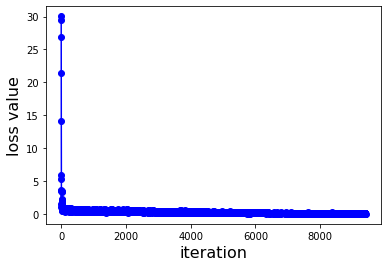

In [8]:
model.train(train, val, test)

In [9]:
model.save_model('./save_model/model_CNN_CNN_Davis')